In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [3]:
# get library mnist data
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


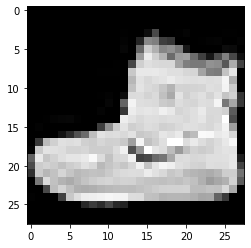

In [4]:
# visualize data
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap = 'gray')

In [5]:
print('label:', training_labels[0])
print()
print('data', training_images[0])

label: 9

data [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232

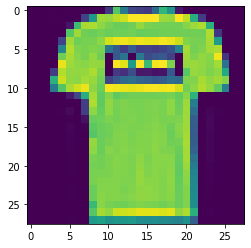

In [6]:
plt.imshow(training_images[1])

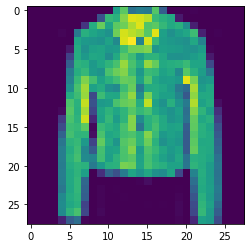

In [7]:
plt.imshow(test_images[10])

In [8]:
# normalization
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [9]:
print('data', training_images[0])

data [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0

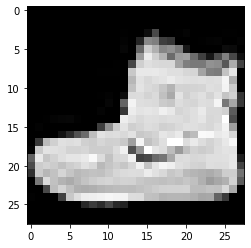

In [10]:
plt.imshow(training_images[0], cmap = 'gray')

In [11]:
# model design
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])

In [12]:
# compile model
model.compile(
              optimizer = optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy']
              )

In [13]:
# model run
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6306 - accuracy: 0.7803
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3822 - accuracy: 0.8619
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3109 - accuracy: 0.8880
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.8919


In [14]:
# evaluate
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3562 - accuracy: 0.8785


[0.3562151789665222, 0.8784999847412109]

In [118]:
# predict
model.predict( np.expand_dims(test_images[1], axis=0) )

array([[1.78453647e-05, 1.64678028e-11, 9.97099876e-01, 1.16134116e-10, 8.72294127e-04, 1.05020430e-12, 2.01000134e-03, 8.71197781e-14, 3.84357683e-08, 1.89986780e-13]], dtype=float32)

In [121]:
# predict
model.predict( test_images[[12]] )

array([[4.9907283e-07, 2.1240419e-08, 3.9986926e-08, 3.3518582e-08, 7.9187032e-08, 2.0283523e-01, 2.2125542e-08, 7.8908980e-01, 8.0710677e-03, 3.1295028e-06]], dtype=float32)

In [139]:
model.predict(
    test_images[[2 ,6, 12, 34]]
)

array([[1.8759873e-07, 9.9999964e-01, 1.3037304e-08, 1.2350401e-07, 5.9976166e-08, 1.6197887e-15, 3.9271844e-09, 4.7656001e-16, 5.3199778e-10, 2.8781059e-15],
       [5.5702822e-05, 6.6352186e-05, 1.4262834e-02, 6.7001609e-05, 9.7539312e-01, 5.7919340e-07, 1.0128545e-02, 4.5202903e-08, 2.5759022e-05, 2.3844020e-09],
       [4.9907288e-07, 2.1240423e-08, 3.9987007e-08, 3.3518585e-08, 7.9186741e-08, 2.0283517e-01, 2.2125590e-08, 7.8908992e-01, 8.0710649e-03, 3.1295003e-06],
       [3.2433810e-08, 2.7587383e-13, 5.9889416e-08, 1.2614047e-10, 2.1162849e-08, 1.2108626e-09, 1.8383978e-11, 2.4957720e-12, 9.9999988e-01, 4.9629545e-15]], dtype=float32)